# Analyze Districts in Madrid to open a cafeteria

## Description

Madrid is the capital of Spain and its largest city. It is located in the center of the peninsula, as the capital of Spain Madrid has the seat of government, the Court and is also the official residence of the King and Queen of Spain.
On the economic level, Madrid is home to the headquarters of many national and international companies. Culturally, Madrid has world-famous museums such as the Prado Museum and the Reina Sofia Museum. Madrid's neighborhoods are full of history and peculiar characteristics that make them unique.


Madrid stands out for the infinity of bars, restaurants and cafes in its streets. No doubt in every walk through the city we discover new places and the list of places to go is getting longer and longer.
This project aims to help by analyzing the characteristics of the districts of Madrid, its impact on the COVID combined with the data and datasets of the city, will determine the best or possible locations for a new restaurant type cafeteria. 

## Data description

The data will be collected from different Madrid official soruces all of them with real and current data 

* COVID datasets distributed by districts: https://datos.comunidad.madrid/catalogo/dataset/covid19_tia_muni_y_distritos/resource/877fa8f5-cd6c-4e44-9df5-0fb60944a841
* Neighborhoods an districts information: https://datos.gob.es/en/catalogo/a13002908-covid-19-tia-por-municipios-y-distritos-de-madrid1
* Prominents Madrid's data: https://datos.madrid.es/portal/site/egob/menuitem.ca8ea3bd9f53b2811ff64a46a8a409a0/?vgnextoid=6db862c549810510VgnVCM1000008a4a900aRCRD&vgnextchannel=6db862c549810510VgnVCM1000008a4a900aRCRD&vgnextfmt=default
* District's numbers: https://www.madrid.es/portales/munimadrid/es/Inicio/El-Ayuntamiento/Estadistica/Distritos-en-cifras/Distritos-en-cifras-Informacion-de-Distritos-/?vgnextfmt=default&vgnextoid=74b33ece5284c310VgnVCM1000000b205a0aRCRD&vgnextchannel=27002d05cb71b310VgnVCM1000000b205a0aRCRD#

## Venue data

The data will be extracted from the API Foursquare wich has large numbers of venues throughout the different districts

**Import libraries**

In [434]:
import random
from IPython.display import Image
from IPython.core.display import HTML
from pandas.io.json import json_normalize
import geocoder
from geopy.geocoders import Nominatim
import folium
from folium import plugins
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
from bs4 import BeautifulSoup
import requests
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [4]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### Data analysis and wrangling
The csv file is taken from the links given above

In [290]:
madrid_data = pd.read_csv('Barrios.csv', sep=";", encoding='latin-1')
madrid_data.head()

OBJECTID_1 DISTRICT NEIGHBORHOOD  DISTRICT_LATITUDE  DISTRICT_LONGITUDE  \
0  60          Centro   Palacio      40.415347         -3.707371             
1  50          Centro   Embajadores  40.415347         -3.707371             
2  55          Centro   Cortes       40.415347         -3.707371             
3  64          Centro   Justicia     40.415347         -3.707371             
4  66          Centro   Universidad  40.415347         -3.707371             

    Shape_Leng   Shape_Area  COD_DIS  COD_DIS_TX   BARRIO_MAY  COD_DISBAR  \
0  5754,822748  1469905,684  1        1           PALACIO      11           
1  4275,227681  1033724,698  1        1           EMBAJADORES  12           
2  3731,07903   591874,1219  1        1           CORTES       13           
3  3597,421427  739414,338   1        1           JUSTICIA     14           
4  4060,075813  948027,0773  1        1           UNIVERSIDAD  15           

   COD_BAR  NUM_BAR    BARRIO_MT COD_DISB  
0  11       1        PALACIO      1_1      
1  12       2        EMBAJADORES  1_2      
2  13       3        CORTES       1_3      
3  14       4        JUSTICIA     1_4      
4  15       5        UNIVERSIDAD  1_5

In [291]:
madrid_data.drop(['OBJECTID_1','Shape_Leng','Shape_Area', ], axis = 1, inplace=True)
madrid_data.head()

DISTRICT NEIGHBORHOOD  DISTRICT_LATITUDE  DISTRICT_LONGITUDE  COD_DIS  \
0  Centro   Palacio      40.415347         -3.707371            1         
1  Centro   Embajadores  40.415347         -3.707371            1         
2  Centro   Cortes       40.415347         -3.707371            1         
3  Centro   Justicia     40.415347         -3.707371            1         
4  Centro   Universidad  40.415347         -3.707371            1         

   COD_DIS_TX   BARRIO_MAY  COD_DISBAR  COD_BAR  NUM_BAR    BARRIO_MT COD_DISB  
0  1           PALACIO      11          11       1        PALACIO      1_1      
1  1           EMBAJADORES  12          12       2        EMBAJADORES  1_2      
2  1           CORTES       13          13       3        CORTES       1_3      
3  1           JUSTICIA     14          14       4        JUSTICIA     1_4      
4  1           UNIVERSIDAD  15          15       5        UNIVERSIDAD  1_5

In [292]:
madrid_data.drop(['COD_DIS','COD_DIS_TX','BARRIO_MAY','COD_DISBAR','COD_BAR','NUM_BAR','BARRIO_MT','COD_DISB'], axis = 1, inplace=True)
madrid_data.head()

DISTRICT NEIGHBORHOOD  DISTRICT_LATITUDE  DISTRICT_LONGITUDE
0  Centro   Palacio      40.415347         -3.707371          
1  Centro   Embajadores  40.415347         -3.707371          
2  Centro   Cortes       40.415347         -3.707371          
3  Centro   Justicia     40.415347         -3.707371          
4  Centro   Universidad  40.415347         -3.707371

Madrid latitude and longitude:

In [293]:
city = 'Madrid, MAD'
geolocator = Nominatim(user_agent="madrid")
location = geolocator.geocode(city)
latitude = location.latitude
longitude = location.longitude
print("Madrid latitude: ", location.latitude, "\n", "Madrid longitude: ", location.longitude)

Madrid latitude:  40.4948384 
 Madrid longitude:  -3.5740806206811313


In [294]:
# this is another way using Nominatim passing the coordinates we can see its name

geolocator = Nominatim(user_agent = "url")
location = geolocator.reverse("40.4948384 , -3.5740806206811313")
print(location.address)

Aeropuerto de Madrid-Barajas Adolfo Suárez, Barajas, Madrid, Área metropolitana de Madrid y Corredor del Henares, Comunidad de Madrid, 28001, España


**Madrid map with districts and neighborhoods:**

In [295]:
# create map of Madrid using latitude and longitude values
madrid_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, district, neighborhood in zip(madrid_data['DISTRICT_LATITUDE'],madrid_data['DISTRICT_LONGITUDE'],madrid_data['DISTRICT'],madrid_data['NEIGHBORHOOD']):
    label = '{}, {}'.format(neighborhood,district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(madrid_map)

madrid_map


**Madrid COVID data**

In [15]:
madrid_covid = pd.read_csv('COVID_madrid.csv', sep=";", encoding='latin-1')
madrid_covid.head()

municipio_distrito   latitude  longitude     fecha_informe  \
0      Madrid-Retiro  40.408072  -3.676729  29/06/2021 12:04   
1   Madrid-Salamanca  40.430000  -3.677778  29/06/2021 12:04   
2      Madrid-Centro  40.415347  -3.707371  29/06/2021 12:04   
3  Madrid-Arganzuela  40.402733  -3.695403  29/06/2021 12:04   
4   Madrid-Chamartín  40.453333  -3.677500  29/06/2021 12:04   

   casos_confirmados_activos_ultimos_14dias  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   tasa_incidencia_acumulada_activos_ultimos_14dias  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   casos_confirmados_ultimos_14dias tasa_incidencia_acumulada_ultimos_14dias  \
0                             105.0                                    87,24   
1                             175.0                                   118,37   
2                             173.0                                   123,11   
3                             206.0                                   132,35   
4                             182.0                                   123,35   

   casos_confirmados_totales  poblacion_distrito  \
0                    12414.0            120238.0   
1                    16615.0            147349.0   
2                    15821.0            140360.0   
3                    16282.0            156010.0   
4                    15996.0            147483.0   

  tasa_incidencia_acumulada_total  codigo_geometria  
0                        10314,06           79603.0  
1                        11238,43           79604.0  
2                        11258,58           79601.0  
3                        10460,78           79602.0  
4                        10841,14           79605.0

In [16]:
madrid_covid.drop(['tasa_incidencia_acumulada_activos_ultimos_14dias','tasa_incidencia_acumulada_ultimos_14dias','codigo_geometria','casos_confirmados_activos_ultimos_14dias'], axis=1, inplace=True)

In [17]:
madrid_covid

municipio_distrito   latitude  longitude     fecha_informe  \
0              Madrid-Retiro  40.408072  -3.676729  29/06/2021 12:04   
1           Madrid-Salamanca  40.430000  -3.677778  29/06/2021 12:04   
2              Madrid-Centro  40.415347  -3.707371  29/06/2021 12:04   
3          Madrid-Arganzuela  40.402733  -3.695403  29/06/2021 12:04   
4           Madrid-Chamartín  40.453333  -3.677500  29/06/2021 12:04   
...                      ...        ...        ...               ...   
11509                 Getafe        NaN        NaN   26/05/2020 7:00   
11510             Ribatejada        NaN        NaN   26/05/2020 7:00   
11511           Villaconejos        NaN        NaN   26/05/2020 7:00   
11512  Valdetorres de Jarama        NaN        NaN   26/05/2020 7:00   
11513     Pozuelo de Alarcón        NaN        NaN   26/05/2020 7:00   

       casos_confirmados_ultimos_14dias  casos_confirmados_totales  \
0                                 105.0                    12414.0   
1                                 175.0                    16615.0   
2                                 173.0                    15821.0   
3                                 206.0                    16282.0   
4                                 182.0                    15996.0   
...                                 ...                        ...   
11509                              60.0                     1463.0   
11510                               NaN                        NaN   
11511                               NaN                        9.0   
11512                               NaN                       18.0   
11513                              25.0                      837.0   

       poblacion_distrito tasa_incidencia_acumulada_total  
0                120238.0                        10314,06  
1                147349.0                        11238,43  
2                140360.0                        11258,58  
3                156010.0                        10460,78  
4                147483.0                        10841,14  
...                   ...                             ...  
11509                 NaN                          797,82  
11510                 NaN                          255,43  
11511                 NaN                          265,64  
11512                 NaN                          400,27  
11513                 NaN                           968,5  

[11514 rows x 8 columns]

Unnecessary rows are eliminated, leaving only the first 21 rows corresponding to the 21 districts of Madrid which have the most recent case reports. which have the most recent report of cases

In [18]:
madrid_covid=madrid_covid.iloc[0:21]

In [19]:
madrid_covid.shape

(21, 8)

"Madrid-" is removed from the municipio_distrito column since we only need the name of the district.

In [20]:
madrid_covid['municipio_distrito']=madrid_covid['municipio_distrito'].replace({'Madrid-':''}, regex=True)

Columns names:
   * municipio_distrito: district name
   * fecha_informe: date of the report
   * casos_confirmados_ultimos_14dias: confirmed cases for the last 14 days
   * casos_confirmados_totales: total confirmed cases for each district
   * poblacion_distrito: district population
   * tasa_incidencia_acumulada_total: total cumulative incidence rate

In [21]:
madrid_covid

municipio_distrito   latitude  longitude     fecha_informe  \
0                  Retiro  40.408072  -3.676729  29/06/2021 12:04   
1               Salamanca  40.430000  -3.677778  29/06/2021 12:04   
2                  Centro  40.415347  -3.707371  29/06/2021 12:04   
3              Arganzuela  40.402733  -3.695403  29/06/2021 12:04   
4               Chamartín  40.453333  -3.677500  29/06/2021 12:04   
5                  Tetuán  40.460556  -3.700000  29/06/2021 12:04   
6                Chamberí  40.432792  -3.697186  29/06/2021 12:04   
7     Fuencarral-El Pardo  40.478611  -3.709722  29/06/2021 12:04   
8         Moncloa-Aravaca  40.435151  -3.718765  29/06/2021 12:04   
9                  Latina  40.402461  -3.741294  29/06/2021 12:04   
10            Carabanchel  40.383669  -3.727989  29/06/2021 12:04   
11                  Usera  40.381336  -3.706856  29/06/2021 12:04   
12     Puente de Vallecas  40.398204  -3.669059  29/06/2021 12:04   
13  San Blas - Canillejas  40.426001  -3.612764  29/06/2021 12:04   
14                Barajas  40.470196  -3.584890  29/06/2021 12:04   
15              Moratalaz  40.409869  -3.644436  29/06/2021 12:04   
16          Ciudad Lineal  40.453333  -3.650000  29/06/2021 12:04   
17              Hortaleza  40.469457  -3.640482  29/06/2021 12:04   
18             Villaverde  40.345925  -3.709356  29/06/2021 12:04   
19      Villa de Vallecas  40.379600  -3.621350  29/06/2021 12:04   
20              Vicálvaro  40.404200  -3.608060  29/06/2021 12:04   

    casos_confirmados_ultimos_14dias  casos_confirmados_totales  \
0                              105.0                    12414.0   
1                              175.0                    16615.0   
2                              173.0                    15821.0   
3                              206.0                    16282.0   
4                              182.0                    15996.0   
5                              128.0                    17464.0   
6                              185.0                    16486.0   
7                              204.0                    24499.0   
8                              113.0                    14199.0   
9                              167.0                    25016.0   
10                             172.0                    28794.0   
11                              97.0                    16452.0   
12                             168.0                    32344.0   
13                             152.0                    16636.0   
14                              67.0                     4907.0   
15                              90.0                    10609.0   
16                             155.0                    24269.0   
17                             206.0                    19116.0   
18                              94.0                    17744.0   
19                              54.0                    11923.0   
20                              48.0                     7441.0   

    poblacion_distrito tasa_incidencia_acumulada_total  
0             120238.0                        10314,06  
1             147349.0                        11238,43  
2             140360.0                        11258,58  
3             156010.0                        10460,78  
4             147483.0                        10841,14  
5             161233.0                        10821,06  
6             140516.0                        11705,98  
7             250655.0                         9803,17  
8             121880.0                        11670,67  
9             242447.0                        10330,66  
10            260801.0                        11065,25  
11            143141.0                        11499,02  
12            241901.0                        13425,98  
13            161696.0                        10322,28  
14             50320.0                         9817,34  
15             95375.0                        11101,11  
16            220118.0                      

<AxesSubplot:xlabel='municipio_distrito'>

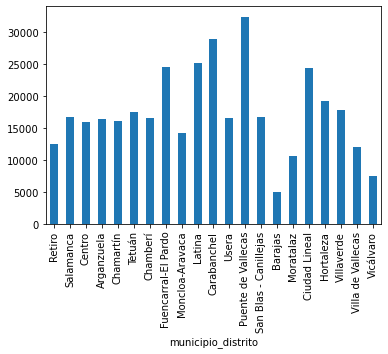

In [22]:
madrid_covid.set_index('municipio_distrito')['casos_confirmados_totales'].plot(kind='bar')

In [487]:
mean = madrid_covid["casos_confirmados_totales"].mean()
median = madrid_covid["casos_confirmados_totales"].median()
mode = madrid_covid["casos_confirmados_totales"].mode()
print("Mean: {}, Median: {}, Mode: {}".format(mean, median, mode))

Mean: 17382.238095238095, Median: 16486.0, Mode: 0     4907.0 
1     7441.0 
2     10609.0
3     11923.0
4     12414.0
5     14199.0
6     15821.0
7     15996.0
8     16282.0
9     16452.0
10    16486.0
11    16615.0
12    16636.0
13    17464.0
14    17744.0
15    19116.0
16    24269.0
17    24499.0
18    25016.0
19    28794.0
20    32344.0
dtype: float64


In [23]:
# Create map of Madrid using latitude and longitude values
district_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, district, confirmed in zip(madrid_covid['latitude'],madrid_covid['longitude'],madrid_covid['municipio_distrito'], madrid_covid['casos_confirmados_totales']):
    label = '{},  {} Confirmed cases'.format(district, confirmed)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(district_map)

district_map

In [24]:
madrid_covid['municipio_distrito']

0                    Retiro
1                 Salamanca
2                    Centro
3                Arganzuela
4                 Chamartín
5                    Tetuán
6                  Chamberí
7       Fuencarral-El Pardo
8           Moncloa-Aravaca
9                    Latina
10              Carabanchel
11                    Usera
12       Puente de Vallecas
13    San Blas - Canillejas
14                  Barajas
15                Moratalaz
16            Ciudad Lineal
17                Hortaleza
18               Villaverde
19        Villa de Vallecas
20                Vicálvaro
Name: municipio_distrito, dtype: object

In [25]:
madrid_covid.head()

municipio_distrito   latitude  longitude     fecha_informe  \
0             Retiro  40.408072  -3.676729  29/06/2021 12:04   
1          Salamanca  40.430000  -3.677778  29/06/2021 12:04   
2             Centro  40.415347  -3.707371  29/06/2021 12:04   
3         Arganzuela  40.402733  -3.695403  29/06/2021 12:04   
4          Chamartín  40.453333  -3.677500  29/06/2021 12:04   

   casos_confirmados_ultimos_14dias  casos_confirmados_totales  \
0                             105.0                    12414.0   
1                             175.0                    16615.0   
2                             173.0                    15821.0   
3                             206.0                    16282.0   
4                             182.0                    15996.0   

   poblacion_distrito tasa_incidencia_acumulada_total  
0            120238.0                        10314,06  
1            147349.0                        11238,43  
2            140360.0                        11258,58  
3            156010.0                        10460,78  
4            147483.0                        10841,14

Function that extracts the **category of the venue**

In [26]:
def categories_type(row):
    categories_list = row['venue.categories']
    if len(categories_list)  == 0:
        return None
    else:
        return categories_list[0]['name']

In [27]:
foursquare_venues=pd.DataFrame()
mdc = []

In [28]:
for latitude, longitude, distr, conf in zip(madrid_covid['latitude'],madrid_covid['longitude'],madrid_covid['municipio_distrito'],madrid_covid['casos_confirmados_totales']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude, 
            radius, 
            LIMIT)
    results = requests.get(url).json()
    venues = pd.json_normalize(results['response']['groups'][0]['items'])
    filtered_columns = ['venue.id', 'venue.location.lat', 'venue.location.lng', 'venue.name', 'venue.categories']
    venues_df = venues[filtered_columns]
    venues_df['venue.categories'] = venues_df.apply(categories_type, axis=1)
    venues_df['district']=distr
    venues_df['confirmed']=conf
    mdc.append(venues_df)    
    
    

Venues from the API Foursquare with each district and COVID confirmed cases

In [29]:
foursquare_venues = pd.concat(mdc)
foursquare_venues.head()

venue.id  venue.location.lat  venue.location.lng  \
0  4da9810d8154abafc2948f8e           40.410987           -3.680377   
1  4d28cb43342d6dcb624dfcca           40.404065           -3.677902   
2  4bc201b0f8219c741615b410           40.407648           -3.680188   
3  4e6276311838ad3d0eceb6c9           40.412714           -3.677826   
4  4bc8a39e6501c9b6b88f4029           40.406407           -3.681303   

                      venue.name    venue.categories district  confirmed  
0            Rosaleda del Retiro              Garden   Retiro    12414.0  
1              El Rincón de Fogg        Burger Joint   Retiro    12414.0  
2                   Don Giovanni  Italian Restaurant   Retiro    12414.0  
3  Jardines de Cecilio Rodríguez              Garden   Retiro    12414.0  
4                           EFTI         Art Gallery   Retiro    12414.0

In [30]:
foursquare_venues.shape

(1898, 7)

In [31]:
print('{} venues were returned by Foursquare.'.format(foursquare_venues.shape[0]))

1898 venues were returned by Foursquare.


In [32]:
foursquare_venues['venue.categories'].value_counts()

Spanish Restaurant    174
Restaurant            109
Hotel                  72
Park                   71
Tapas Restaurant       65
                     ... 
Soup Place              1
Motorcycle Shop         1
Board Shop              1
Arcade                  1
Gas Station             1
Name: venue.categories, Length: 214, dtype: int64

In [467]:
# cafeteria venues
venues_cafeteria = foursquare_venues[foursquare_venues['venue.categories'] == 'Cafeteria']
venues_cafeteria

venue.id  venue.location.lat  venue.location.lng  \
25  4b7137e0f964a520f23c2de3  40.479636          -3.707357             
28  4b6d7fddf964a52088782ce3  40.429069          -3.715079             
14  59ea4524ccad6b7e88d32a86  40.391304          -3.701123             
92  4b673c58f964a520fd422be3  40.462823          -3.636758             
23  4b673c58f964a520fd422be3  40.462823          -3.636758             

                 venue.name venue.categories             district  confirmed  
25  Starbucks CC La Vaguada  Cafeteria        Fuencarral-El Pardo  24499.0    
28  Starbucks Princesa 40    Cafeteria        Moncloa-Aravaca      14199.0    
14  Starbucks Plaza Río 2    Cafeteria        Usera                16452.0    
92  Starbucks CC Dreams      Cafeteria        Ciudad Lineal        24269.0    
23  Starbucks CC Dreams      Cafeteria        Hortaleza            19116.0

Lets start by exploring just the first district in our dataframe using Foursquare API.

In [385]:
district_name = madrid_data.loc[0, 'District']
district_lat = madrid_data.loc[0, 'District_Latitude']
district_long = madrid_data.loc[0, 'District_Longitude']

print("The district is {} and it's district's coordinates are {} latitude and {} longitude".format(district_name,
                                                                                                        district_lat, district_long))



The district is Centro and it's district's coordinates are 40.415347 latitude and -3.7073709999999997 longitude


In [386]:
# API Foursquare
LIMIT = 100
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    district_lat, 
    district_long, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=IYJ1TPEJFEWISEQRDNZNXO4HJQ0MTMY0AVDGBJBOLUEYAGH0&client_secret=HSVKU5JZT2OEKVIW33NFPEGPDFT4Z1OLKCY2FDFRFO023T4B&v=20180604&ll=40.415347,-3.7073709999999997&radius=1000&limit=100'

This function extracts the categories of venues

In [388]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Cleaning the json and structure it into a pandas dataframe

In [389]:
venues = results['response']['groups'][0]['items']

nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name          categories        lat  \
0  Mesón El Águila                        Spanish Restaurant  40.401573   
1  Heladería Sienna - Sienna Winter Café  Ice Cream Shop      40.402532   
2  Parque de Valdebernardo                Park                40.397950   
3  Ahorramás                              Grocery Store       40.404239   
4  La Madrina                             Pizza Place         40.398139   

        lng  
0 -3.607245  
1 -3.606221  
2 -3.606945  
3 -3.605553  
4 -3.606602

In [390]:
print("{} venues were returned for {} by Foursquare".format(len(nearby_venues), district_name))

72 venues were returned for Centro by Foursquare


Getting nearby venues for all districts by creating the function getNearbyVenues.This function extracts the venues data for the districts in Madrid

In [397]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District',
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [398]:
# we run the above function on each district and create a new dataframe called madrid_venues.
madrid_venues = getNearbyVenues(names=madrid_data['District'],
                                   latitudes=madrid_data['District_Latitude'],
                                   longitudes=madrid_data['District_Longitude']
                                  )

Centro
Centro
Centro
Centro
Centro
Centro
Arganzuela
Arganzuela
Arganzuela
Arganzuela
Arganzuela
Arganzuela
Arganzuela
Retiro
Retiro
Retiro
Retiro
Retiro
Retiro
Salamanca
Salamanca
Salamanca
Salamanca
Salamanca
Salamanca
Chamartin
Chamartin
Chamartin
Chamartin
Chamartin
Chamartin
Tetuan
Tetuan
Tetuan
Tetuan
Tetuan
Tetuan
Chamberi
Chamberi
Chamberi
Chamberi
Chamberi
Chamberi
Fuencarral - El Pardo
Fuencarral - El Pardo
Fuencarral - El Pardo
Fuencarral - El Pardo
Fuencarral - El Pardo
Fuencarral - El Pardo
Fuencarral - El Pardo
Fuencarral - El Pardo
Moncloa - Aravaca
Moncloa - Aravaca
Moncloa - Aravaca
Moncloa - Aravaca
Moncloa - Aravaca
Moncloa - Aravaca
Moncloa - Aravaca
Latina
Latina
Latina
Latina
Latina
Latina
Latina
Carabanchel
Carabanchel
Carabanchel
Carabanchel
Carabanchel
Carabanchel
Carabanchel
Usera
Usera
Usera
Usera
Usera
Usera
Usera
Puente de Vallecas
Puente de Vallecas
Puente de Vallecas
Puente de Vallecas
Puente de Vallecas
Puente de Vallecas
Moratalaz
Moratalaz
Moratalaz
Mo

In [399]:
print(madrid_venues.shape)
madrid_venues.head()

(4707, 7)


District   Latitude  Longitude                           Venue  \
0  Centro   40.415347 -3.707371   Plaza Mayor                      
1  Centro   40.415347 -3.707371   Mercado de San Miguel            
2  Centro   40.415347 -3.707371   The Hat Madrid                   
3  Centro   40.415347 -3.707371   La Taberna de Mister Pinkleton   
4  Centro   40.415347 -3.707371   Plaza Menor                      

   Venue Latitude  Venue Longitude   Venue Category  
0  40.415527      -3.707506         Plaza            
1  40.415443      -3.708943         Market           
2  40.414343      -3.707120         Hotel            
3  40.414536      -3.708108         Other Nightlife  
4  40.414192      -3.708494         Lounge

Counting venues grouped by district:

In [400]:
madrid_venues.groupby('District').count()

Latitude  Longitude  Venue  Venue Latitude  \
District                                                            
Arganzuela             595       595        595    595              
Barajas                155       155        155    155              
Carabanchel            63        63         63     63               
Centro                 600       600        600    600              
Chamartin              336       336        336    336              
Chamberi               600       600        600    600              
Ciudad Lineal          234       234        234    234              
Fuencarral - El Pardo  312       312        312    312              
Hortaleza              108       108        108    108              
Latina                 77        77         77     77               
Moncloa - Aravaca      392       392        392    392              
Moratalaz              72        72         72     72               
Puente de Vallecas     156       156        156    156              
Retiro                 246       246        246    246              
Salamanca              312       312        312    312              
San Blas - Canillejas  80        80         80     80               
Tetuan                 192       192        192    192              
Usera                  84        84         84     84               
Vicalvaro              44        44         44     44               
Villa de Vallecas      24        24         24     24               
Villaverde             25        25         25     25               

                       Venue Longitude  Venue Category  
District                                                
Arganzuela             595              595             
Barajas                155              155             
Carabanchel            63               63              
Centro                 600              600             
Chamartin              336              336             
Chamberi               600              600             
Ciudad Lineal          234              234             
Fuencarral - El Pardo  312              312             
Hortaleza              108              108             
Latina                 77               77              
Moncloa - Aravaca      392              392             
Moratalaz              72               72              
Puente de Vallecas     156              156             
Retiro                 246              246             
Salamanca              312              312             
San Blas - Canillejas  80               80              
Tetuan                 192              192             
Usera                  84               84              
Vicalvaro              44               44              
Villa de Vallecas      24               24              
Villaverde             25               25

In [401]:
print("There are {} unique categories".format(len(madrid_venues['Venue Category'].unique())))

There are 165 unique categories


In [402]:
# one hot encoding
madrid_onehot = pd.get_dummies(madrid_venues[['Venue Category']], prefix="", prefix_sep="")

# add disctrict column back to dataframe
madrid_onehot['District'] = madrid_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [madrid_onehot.columns[-1]] + list(madrid_onehot.columns[:-1])
madrid_onehot = madrid_onehot[fixed_columns]

madrid_onehot.head(5)

District  American Restaurant  Arepa Restaurant  Argentinian Restaurant  \
0  Centro   0                    0                 0                        
1  Centro   0                    0                 0                        
2  Centro   0                    0                 0                        
3  Centro   0                    0                 0                        
4  Centro   0                    0                 0                        

   Art Gallery  Art Museum  Art Studio  Arts & Crafts Store  Asian Restaurant  \
0  0            0           0           0                    0                  
1  0            0           0           0                    0                  
2  0            0           0           0                    0                  
3  0            0           0           0                    0                  
4  0            0           0           0                    0                  

   Athletics & Sports  Auto Workshop  BBQ Joint  Bakery  Bar  Beer Bar  \
0  0                   0              0          0       0    0          
1  0                   0              0          0       0    0          
2  0                   0              0          0       0    0          
3  0                   0              0          0       0    0          
4  0                   0              0          0       0    0          

   Beer Garden  Big Box Store  Bistro  Board Shop  Bookstore  Boutique  \
0  0            0              0       0           0          0          
1  0            0              0       0           0          0          
2  0            0              0       0           0          0          
3  0            0              0       0           0          0          
4  0            0              0       0           0          0          

   Boxing Gym  Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  \
0  0           0                     0               0        0                 
1  0           0                     0               0        0                 
2  0           0                     0               0        0                 
3  0           0                     0               0        0                 
4  0           0                     0               0        0                 

   Burger Joint  Burrito Place  Bus Line  Bus Station  Cafeteria  Café  \
0  0             0              0         0            0          0      
1  0             0              0         0            0          0      
2  0             0              0         0            0          0      
3  0             0              0         0            0          0      
4  0             0              0         0            0          0      

   Candy Store  Cantonese Restaurant  Chinese Restaurant  Chocolate Shop  \
0  0            0                     0                   0                
1  0            0                     0                   0                
2  0            0                     0                   0                
3  0            0                     0                   0                
4  0            0                     0                   0                

   Circus  Clothing Store  Cocktail Bar  Coffee Shop  Concert Hall  \
0  0       0               0             0            0              
1  0       0               0             0            0              
2  0       0               0             0            0              
3  0       0               0             0            0              
4  0       0               0             0            0              

   Cosmetics Shop  Creperie  Cuban Restaurant  Cupcake Shop  Dance Studio  \
0  0               0         0                 0             0              
1  0               0         0                 0             0              
2  0               0         0                 0             0              
3  0               0         0              

In [403]:
madrid_grouped = madrid_onehot.groupby('District').mean().reset_index()
madrid_grouped

District  American Restaurant  Arepa Restaurant  \
0   Arganzuela             0.00                 0.023529           
1   Barajas                0.00                 0.000000           
2   Carabanchel            0.00                 0.000000           
3   Centro                 0.01                 0.000000           
4   Chamartin              0.00                 0.000000           
5   Chamberi               0.01                 0.000000           
6   Ciudad Lineal          0.00                 0.000000           
7   Fuencarral - El Pardo  0.00                 0.000000           
8   Hortaleza              0.00                 0.000000           
9   Latina                 0.00                 0.000000           
10  Moncloa - Aravaca      0.00                 0.000000           
11  Moratalaz              0.00                 0.000000           
12  Puente de Vallecas     0.00                 0.000000           
13  Retiro                 0.00                 0.000000           
14  Salamanca              0.00                 0.000000           
15  San Blas - Canillejas  0.00                 0.000000           
16  Tetuan                 0.00                 0.000000           
17  Usera                  0.00                 0.000000           
18  Vicalvaro              0.00                 0.000000           
19  Villa de Vallecas      0.00                 0.000000           
20  Villaverde             0.00                 0.000000           

    Argentinian Restaurant  Art Gallery  Art Museum  Art Studio  \
0   0.000000                0.000000     0.00        0.00000      
1   0.032258                0.000000     0.00        0.00000      
2   0.000000                0.000000     0.00        0.00000      
3   0.000000                0.000000     0.00        0.00000      
4   0.000000                0.000000     0.00        0.00000      
5   0.000000                0.010000     0.01        0.00000      
6   0.076923                0.000000     0.00        0.00000      
7   0.000000                0.000000     0.00        0.00000      
8   0.055556                0.000000     0.00        0.00000      
9   0.000000                0.000000     0.00        0.00000      
10  0.000000                0.000000     0.00        0.00000      
11  0.000000                0.000000     0.00        0.00000      
12  0.000000                0.000000     0.00        0.00000      
13  0.000000                0.024390     0.00        0.00000      
14  0.000000                0.019231     0.00        0.00000      
15  0.000000                0.000000     0.00        0.00000      
16  0.000000                0.000000     0.00        0.03125      
17  0.000000                0.000000     0.00        0.00000      
18  0.000000                0.000000     0.00        0.00000      
19  0.000000                0.000000     0.00        0.00000      
20  0.000000                0.000000     0.00        0.00000      

    Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Workshop  \
0   0.000000             0.011765          0.000000            0.00000         
1   0.000000             0.000000          0.000000            0.00000         
2   0.000000             0.000000          0.000000            0.00000         
3   0.000000             0.000000          0.000000            0.00000         
4   0.000000             0.000000          0.000000            0.00000         
5   0.000000             0.020000          0.000000            0.00000         
6   0.000000             0.000000          0.000000            0.00000         
7   0.000000             0.000000          0.000000            0.00000         
8   0.000000             0.000000          0.000000            0.00000         
9   0.090909             0.090909          0.000000            0.00000         
10  0.000000             0.017857          0.017857            0.00000         
11  0.000000             0.000000          0.000000            0.00000         
12  0

Displaying the top 5 venues of all districts

In [404]:
num_top_venues = 5

for n in madrid_grouped['District']:
    print("----"+n+"----")
    temp = madrid_grouped[madrid_grouped['District']==n].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arganzuela----
                venue  freq
0  Restaurant          0.12
1  Spanish Restaurant  0.09
2  Grocery Store       0.07
3  Bakery              0.06
4  Tapas Restaurant    0.05


----Barajas----
                venue  freq
0  Hotel               0.19
1  Restaurant          0.13
2  Spanish Restaurant  0.10
3  Coffee Shop         0.06
4  Tapas Restaurant    0.06


----Carabanchel----
                  venue  freq
0  Plaza                 0.11
1  Bakery                0.11
2  Fast Food Restaurant  0.11
3  Nightclub             0.11
4  Soccer Field          0.11


----Centro----
                venue  freq
0  Spanish Restaurant  0.13
1  Tapas Restaurant    0.12
2  Plaza               0.10
3  Ice Cream Shop      0.04
4  Hostel              0.04


----Chamartin----
                venue  freq
0  Restaurant          0.14
1  Spanish Restaurant  0.14
2  Café                0.05
3  Bakery              0.05
4  Grocery Store       0.05


----Chamberi----
                venue  freq
0  Sp

Putting the previous into a pandas dataframe

In [405]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Let's create the new dataframe and display the top 10 venues for each neighborhood

In [406]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['District'] = madrid_grouped['District']

for ind in np.arange(madrid_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(madrid_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

District 1st Most Common Venue 2nd Most Common Venue  \
0   Arganzuela             Restaurant            Spanish Restaurant     
1   Barajas                Hotel                 Restaurant             
2   Carabanchel            Pizza Place           Nightclub              
3   Centro                 Spanish Restaurant    Tapas Restaurant       
4   Chamartin              Spanish Restaurant    Restaurant             
5   Chamberi               Spanish Restaurant    Restaurant             
6   Ciudad Lineal          Restaurant            Spanish Restaurant     
7   Fuencarral - El Pardo  Clothing Store        Burger Joint           
8   Hortaleza              Breakfast Spot        Supermarket            
9   Latina                 Pizza Place           Fast Food Restaurant   
10  Moncloa - Aravaca      Restaurant            Tapas Restaurant       
11  Moratalaz              Bar                   Pizza Place            
12  Puente de Vallecas     Fast Food Restaurant  Gym                    
13  Retiro                 Spanish Restaurant    Museum                 
14  Salamanca              Spanish Restaurant    Restaurant             
15  San Blas - Canillejas  Metro Station         Asian Restaurant       
16  Tetuan                 Spanish Restaurant    Grocery Store          
17  Usera                  Spanish Restaurant    Seafood Restaurant     
18  Vicalvaro              Pizza Place           Spanish Restaurant     
19  Villa de Vallecas      Breakfast Spot        Park                   
20  Villaverde             Pizza Place           Train                  

       3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  \
0   Grocery Store             Bakery                Tapas Restaurant         
1   Spanish Restaurant        Coffee Shop           Tapas Restaurant         
2   Fast Food Restaurant      Burger Joint          Tapas Restaurant         
3   Plaza                     Hostel                Ice Cream Shop           
4   Bakery                    Grocery Store         Tapas Restaurant         
5   Bar                       Brewery               Italian Restaurant       
6   Park                      Grocery Store         Argentinian Restaurant   
7   Tapas Restaurant          Fast Food Restaurant  Italian Restaurant       
8   Pizza Place               Sandwich Place        Pub                      
9   Park                      Grocery Store         Train Station            
10  Spanish Restaurant        Pizza Place           Italian Restaurant       
11  Ice Cream Shop            Food Truck            Café                     
12  Grocery Store             Café                  Hotel                    
13  Supermarket               Tapas Restaurant      Bar                      
14  Mediterranean Restaurant  Seafood Restaurant    Burger Joint             
15  Shopping Mall             Supermarket           Snack Place              
16  Brazilian Restaurant      Chinese Restaurant    Supermarket              
17  Chinese Restaurant        Theater               Asian Restaurant         
18  Beer Bar                  Fast Food Restaurant  Grocery Store            
19  Platform                  Grocery Store         Spanish Restaurant       
20  Plaza                     Diner                 Spanish Restaurant       

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0   Gym / Fitness Center  Beer Garden           Market                 
1   Bar                   Fast Food Restaurant  Brewery                
2   Bakery                Soccer Field          Metro Station          
3   Bookstore             Hotel                 Pastry Shop            
4   Café                  Gastropub             Park                   
5   Japanese Restaurant   Café                  Plaza                  
6   Gastropub             Tapas Restaurant      Pharmacy               
7   Shopping Mall         Spanish Restaurant    Big Box Store          
8   Spanish Restaurant    Bakery             

### Cluster Districts

Run k-means to cluster districts.

The following is to determine how many clusters should we use, for this we will use the Silhouette Score - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [407]:
def plot(x, y):
    fig = plt.figure(figsize=(12,6))
    plt.plot(x, y, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.title('Checking Optimum Number of Clusters')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [408]:
maxk = 15
scores = []
kval = []

for k in range(2, maxk+1):
    cl_df = madrid_grouped.drop('District', axis=1)
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=0).fit_predict(cl_df) #Choose any random_state
    
    score = silhouette_score(cl_df, kmeans, metric='euclidean', random_state=0)
    kval.append(k)
    scores.append(score)

[0.1903125726032766, 0.1620096375806738, 0.1940931157107913, 0.18574859973350114, 0.15799897660811957, 0.14931739548789957, 0.11691430041648038, 0.15547870618207524, 0.14334680215501786, 0.041599156450781376, 0.04124564442032303, 0.04168433945809237, 0.029124446627720606, 0.032561698923450386]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


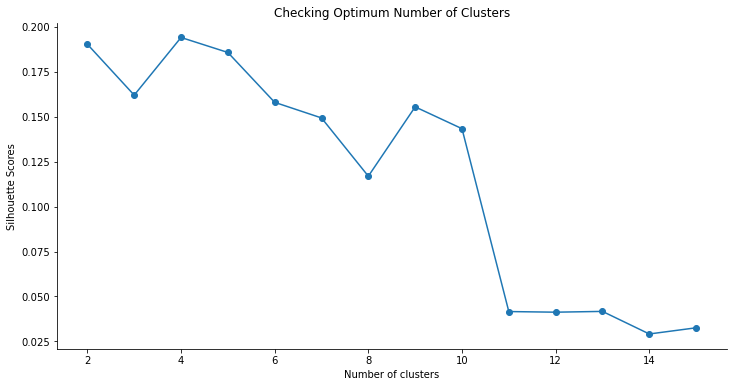

In [409]:
print(scores)
print(kval)
plot(kval, scores)

Acording to the previous we can use 3 or 4 clusters given that it provides the highest silhouette score. Also note that it decreases as the number of clusters increases  

In [410]:
# set number of clusters
kclusters = 4

madrid_grouped_clustering = madrid_grouped.drop('District', 1)

# run k-means clustering

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(madrid_grouped_clustering)

# check cluster labels generated for each row in the dataframe

kmeans.labels_[0:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 3])

In [411]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

madrid_merged = madrid_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
madrid_merged = madrid_merged.join(neighborhoods_venues_sorted.set_index('District'), on='District')

madrid_merged.head() # check the last columns!

District Neighborhood  District_Latitude  District_Longitude  \
0  Centro   Palacio      40.415347         -3.707371             
1  Centro   Embajadores  40.415347         -3.707371             
2  Centro   Cortes       40.415347         -3.707371             
3  Centro   Justicia     40.415347         -3.707371             
4  Centro   Universidad  40.415347         -3.707371             

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0  0               Spanish Restaurant    Tapas Restaurant       
1  0               Spanish Restaurant    Tapas Restaurant       
2  0               Spanish Restaurant    Tapas Restaurant       
3  0               Spanish Restaurant    Tapas Restaurant       
4  0               Spanish Restaurant    Tapas Restaurant       

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0  Plaza                 Hostel                Ice Cream Shop         
1  Plaza                 Hostel                Ice Cream Shop         
2  Plaza                 Hostel                Ice Cream Shop         
3  Plaza                 Hostel                Ice Cream Shop         
4  Plaza                 Hostel                Ice Cream Shop         

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0  Bookstore             Hotel                 Pastry Shop            
1  Bookstore             Hotel                 Pastry Shop            
2  Bookstore             Hotel                 Pastry Shop            
3  Bookstore             Hotel                 Pastry Shop            
4  Bookstore             Hotel                 Pastry Shop            

  9th Most Common Venue 10th Most Common Venue  
0  Cocktail Bar          Gym / Fitness Center   
1  Cocktail Bar          Gym / Fitness Center   
2  Cocktail Bar          Gym / Fitness Center   
3  Cocktail Bar          Gym / Fitness Center   
4  Cocktail Bar          Gym / Fitness Center

In [488]:
# Had to do this the column's names were giving error
madrid_data = madrid_data.rename(columns={'DISTRICT': 'District', 'NEIGHBORHOOD':'Neighborhood', 'DISTRICT_LATITUDE':'District_Latitude',
                                  'DISTRICT_LONGITUDE':'District_Longitude'})
madrid_data

District                                    Neighborhood  \
0    Centro                 Palacio                                          
1    Centro                 Embajadores                                      
2    Centro                 Cortes                                           
3    Centro                 Justicia                                         
4    Centro                 Universidad                                      
5    Centro                 Sol                                              
6    Arganzuela             Imperial                                         
7    Arganzuela             Acacias                                          
8    Arganzuela             Chopera                                          
9    Arganzuela             Legazpi                                          
10   Arganzuela             Delicias                                         
11   Arganzuela             Palos de Moguer                                  
12   Arganzuela             Atocha                                           
13   Retiro                 Pacífico                                         
14   Retiro                 Adelfas                                          
15   Retiro                 Estrella                                         
16   Retiro                 Ibiza                                            
17   Retiro                 Jerónimos                                        
18   Retiro                 Niño Jesús                                       
19   Salamanca              Recoletos                                        
20   Salamanca              Goya                                             
21   Salamanca              Fuente del Berro                                 
22   Salamanca              Guindalera                                       
23   Salamanca              Lista                                            
24   Salamanca              Castellana                                       
25   Chamartin              El Viso                                          
26   Chamartin              Prosperidad                                      
27   Chamartin              Ciudad Jardín                                    
28   Chamartin              Hispanoamérica                                   
29   Chamartin              Nueva España                                     
30   Chamartin              Castilla                                         
31   Tetuan                 Bellas Vistas                                    
32   Tetuan                 Cuatro Caminos                                   
33   Tetuan                 Castillejos                                      
34   Tetuan                 Almenara                                         
35   Tetuan                 Valdeacederas                                    
36   Tetuan                 Berruguete                                       
37   Chamberi               Gaztambide                                       
38   Chamberi               Arapiles                                         
39   Chamberi               Trafalgar                                        
40   Chamberi               Almagro                                          
41   Chamberi               Rios Rosas                                       
42   Chamberi               Vallehermoso                                     
43   Fuencarral - El Pardo  El Pardo                                         
44   Fuencarral - El Pardo  Fuentelareina                                    
45   Fuencarral - El Pardo  Peñagrande                                       
46   Fuencarral - El Pardo  Pilar                                            
47   Fuencarral - El Pardo  La Paz                                           
48   Fuencarral - El Pardo  Valverde                                         
49   Fuencarral - El Pardo  Mirasierra                                       
50   Fuencarral - El Pardo  El Goloso   

Finally, let's visualize the resulting clusters

In [414]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(madrid_merged['District_Latitude'], madrid_merged['District_Longitude'], madrid_merged['District'], madrid_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster 1

In [421]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 0, madrid_merged.columns[[0] + [1] + list(range(5, madrid_merged.shape[1]))]]

District                  Neighborhood  \
0    Centro                 Palacio                        
1    Centro                 Embajadores                    
2    Centro                 Cortes                         
3    Centro                 Justicia                       
4    Centro                 Universidad                    
5    Centro                 Sol                            
6    Arganzuela             Imperial                       
7    Arganzuela             Acacias                        
8    Arganzuela             Chopera                        
9    Arganzuela             Legazpi                        
10   Arganzuela             Delicias                       
11   Arganzuela             Palos de Moguer                
12   Arganzuela             Atocha                         
13   Retiro                 Pacífico                       
14   Retiro                 Adelfas                        
15   Retiro                 Estrella                       
16   Retiro                 Ibiza                          
17   Retiro                 Jerónimos                      
18   Retiro                 Niño Jesús                     
19   Salamanca              Recoletos                      
20   Salamanca              Goya                           
21   Salamanca              Fuente del Berro               
22   Salamanca              Guindalera                     
23   Salamanca              Lista                          
24   Salamanca              Castellana                     
25   Chamartin              El Viso                        
26   Chamartin              Prosperidad                    
27   Chamartin              Ciudad Jardín                  
28   Chamartin              Hispanoamérica                 
29   Chamartin              Nueva España                   
30   Chamartin              Castilla                       
31   Tetuan                 Bellas Vistas                  
32   Tetuan                 Cuatro Caminos                 
33   Tetuan                 Castillejos                    
34   Tetuan                 Almenara                       
35   Tetuan                 Valdeacederas                  
36   Tetuan                 Berruguete                     
37   Chamberi               Gaztambide                     
38   Chamberi               Arapiles                       
39   Chamberi               Trafalgar                      
40   Chamberi               Almagro                        
41   Chamberi               Rios Rosas                     
42   Chamberi               Vallehermoso                   
43   Fuencarral - El Pardo  El Pardo                       
44   Fuencarral - El Pardo  Fuentelareina                  
45   Fuencarral - El Pardo  Peñagrande                     
46   Fuencarral - El Pardo  Pilar                          
47   Fuencarral - El Pardo  La Paz                         
48   Fuencarral - El Pardo  Valverde                       
49   Fuencarral - El Pardo  Mirasierra                     
50   Fuencarral - El Pardo  El Goloso                      
51   Moncloa - Aravaca      Casa de Campo                  
52   Moncloa - Aravaca      Argüelles                      
53   Moncloa - Aravaca      Ciudad Universitaria           
54   Moncloa - Aravaca      Valdezarza                     
55   Moncloa - Aravaca      Valdemarín                     
56   Moncloa - Aravaca      El Plantío                     
57   Moncloa - Aravaca      Aravaca                        
72   Usera                  Orcasitas                      
73   Usera                  Orcasur                        
74   Usera                  San Fermín                     
75   Usera                  Almendrales                    
76   Usera                  Moscardó                       
77   Usera                  Zofío                          
78   Usera                  Pradolongo                     
79   Puente de Vallecas     Entrevías                     

### Cluster 2

In [422]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 1, madrid_merged.columns[[0] + [1] + list(range(5, madrid_merged.shape[1]))]]

District   Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
65  Carabanchel  Comillas       Pizza Place           Nightclub              
66  Carabanchel  Opañel         Pizza Place           Nightclub              
67  Carabanchel  San Isidro     Pizza Place           Nightclub              
68  Carabanchel  Vista Alegre   Pizza Place           Nightclub              
69  Carabanchel  Puerta Bonita  Pizza Place           Nightclub              
70  Carabanchel  Buenavista     Pizza Place           Nightclub              
71  Carabanchel  Abrantes       Pizza Place           Nightclub              
85  Moratalaz    Pavones        Bar                   Pizza Place            
86  Moratalaz    Horcajo        Bar                   Pizza Place            
87  Moratalaz    Marroquina     Bar                   Pizza Place            
88  Moratalaz    Media Legua    Bar                   Pizza Place            
89  Moratalaz    Fontarrón      Bar                   Pizza Place            
90  Moratalaz    Vinateros      Bar                   Pizza Place            

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
65  Fast Food Restaurant  Burger Joint          Tapas Restaurant       
66  Fast Food Restaurant  Burger Joint          Tapas Restaurant       
67  Fast Food Restaurant  Burger Joint          Tapas Restaurant       
68  Fast Food Restaurant  Burger Joint          Tapas Restaurant       
69  Fast Food Restaurant  Burger Joint          Tapas Restaurant       
70  Fast Food Restaurant  Burger Joint          Tapas Restaurant       
71  Fast Food Restaurant  Burger Joint          Tapas Restaurant       
85  Ice Cream Shop        Food Truck            Café                   
86  Ice Cream Shop        Food Truck            Café                   
87  Ice Cream Shop        Food Truck            Café                   
88  Ice Cream Shop        Food Truck            Café                   
89  Ice Cream Shop        Food Truck            Café                   
90  Ice Cream Shop        Food Truck            Café                   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
65  Bakery                Soccer Field          Metro Station          
66  Bakery                Soccer Field          Metro Station          
67  Bakery                Soccer Field          Metro Station          
68  Bakery                Soccer Field          Metro Station          
69  Bakery                Soccer Field          Metro Station          
70  Bakery                Soccer Field          Metro Station          
71  Bakery                Soccer Field          Metro Station          
85  Brewery               Nightclub             Bakery                 
86  Brewery               Nightclub             Bakery                 
87  Brewery               Nightclub             Bakery                 
88  Brewery               Nightclub             Bakery                 
89  Brewery               Nightclub             Bakery                 
90  Brewery               Nightclub             Bakery                 

   9th Most Common Venue 10th Most Common Venue  
65  Plaza                 Diner                  
66  Plaza                 Diner                  
67  Plaza                 Diner                  
68  Plaza                 Diner                  
69  Plaza                 Diner                  
70  Plaza                 Diner                  
71  Plaza                 Diner                  
85  Soccer Field          Plaza                  
86  Soccer Field          Plaza                  
87  Soccer Field          Plaza                  
88  Soccer Field          Plaza                  
89  Soccer Field          Plaza                  
90  Soccer Field          Plaza

### Cluster 3

In [424]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 2, madrid_merged.columns[[0] + [1] + list(range(5, madrid_merged.shape[1]))]]

District                                    Neighborhood  \
106  Villaverde  Villaverde Alto, Casco Histórico de Villaverde   
107  Villaverde  San Cristóbal                                    
108  Villaverde  Butarque                                         
109  Villaverde  Los Rosales                                      
110  Villaverde  Los Ángeles                                      

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
106  Pizza Place           Train                 Plaza                  
107  Pizza Place           Train                 Plaza                  
108  Pizza Place           Train                 Plaza                  
109  Pizza Place           Train                 Plaza                  
110  Pizza Place           Train                 Plaza                  

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
106  Diner                 Spanish Restaurant    Grocery Store          
107  Diner                 Spanish Restaurant    Grocery Store          
108  Diner                 Spanish Restaurant    Grocery Store          
109  Diner                 Spanish Restaurant    Grocery Store          
110  Diner                 Spanish Restaurant    Grocery Store          

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
106  Dog Run               Farmers Market        Falafel Restaurant     
107  Dog Run               Farmers Market        Falafel Restaurant     
108  Dog Run               Farmers Market        Falafel Restaurant     
109  Dog Run               Farmers Market        Falafel Restaurant     
110  Dog Run               Farmers Market        Falafel Restaurant     

    10th Most Common Venue  
106  Fabric Shop            
107  Fabric Shop            
108  Fabric Shop            
109  Fabric Shop            
110  Fabric Shop

### Cluster 4

In [425]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 3, madrid_merged.columns[[0] + [1] + list(range(5, madrid_merged.shape[1]))]]

District      Neighborhood 1st Most Common Venue  \
58   Latina                 Cármenes          Pizza Place            
59   Latina                 Puerta del Ángel  Pizza Place            
60   Latina                 Lucero            Pizza Place            
61   Latina                 Aluche            Pizza Place            
62   Latina                 Campamento        Pizza Place            
63   Latina                 Cuatro Vientos    Pizza Place            
64   Latina                 Águilas           Pizza Place            
118  San Blas - Canillejas  Simancas          Metro Station          
119  San Blas - Canillejas  Hellín            Metro Station          
120  San Blas - Canillejas  Amposta           Metro Station          
121  San Blas - Canillejas  Arcos             Metro Station          
122  San Blas - Canillejas  Rosas             Metro Station          
123  San Blas - Canillejas  Rejas             Metro Station          
124  San Blas - Canillejas  Canillejas        Metro Station          
125  San Blas - Canillejas  Salvador          Metro Station          

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
58   Fast Food Restaurant  Park                  Grocery Store          
59   Fast Food Restaurant  Park                  Grocery Store          
60   Fast Food Restaurant  Park                  Grocery Store          
61   Fast Food Restaurant  Park                  Grocery Store          
62   Fast Food Restaurant  Park                  Grocery Store          
63   Fast Food Restaurant  Park                  Grocery Store          
64   Fast Food Restaurant  Park                  Grocery Store          
118  Asian Restaurant      Shopping Mall         Supermarket            
119  Asian Restaurant      Shopping Mall         Supermarket            
120  Asian Restaurant      Shopping Mall         Supermarket            
121  Asian Restaurant      Shopping Mall         Supermarket            
122  Asian Restaurant      Shopping Mall         Supermarket            
123  Asian Restaurant      Shopping Mall         Supermarket            
124  Asian Restaurant      Shopping Mall         Supermarket            
125  Asian Restaurant      Shopping Mall         Supermarket            

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
58   Train Station         Arts & Crafts Store   Asian Restaurant       
59   Train Station         Arts & Crafts Store   Asian Restaurant       
60   Train Station         Arts & Crafts Store   Asian Restaurant       
61   Train Station         Arts & Crafts Store   Asian Restaurant       
62   Train Station         Arts & Crafts Store   Asian Restaurant       
63   Train Station         Arts & Crafts Store   Asian Restaurant       
64   Train Station         Arts & Crafts Store   Asian Restaurant       
118  Snack Place           Pizza Place           Gas Station            
119  Snack Place           Pizza Place           Gas Station            
120  Snack Place           Pizza Place           Gas Station            
121  Snack Place           Pizza Place           Gas Station            
122  Snack Place           Pizza Place           Gas Station            
123  Snack Place           Pizza Place           Gas Station            
124  Snack Place           Pizza Place           Gas Station            
125  Snack Place           Pizza Place           Gas Station            

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
58   Falafel Restaurant    Metro Station         Bakery                 
59   Falafel Restaurant    Metro Station         Bakery                 
60   Falafel Restaurant    Metro Station         Bakery                 
61   Falafel Restaurant    Metro Station         Bakery                 
62   Falafel Restaurant    Metro Station         Bakery                 
63   Falafel Restaurant    Metro Station         Bakery                 
64   Falafel Restaurant    Metro Station        

## Results and discussion

By segmenting into clusters we can distinguish the different districts of the city of Madrid and their respective venues according to Foursquare, by using Silhouette Score the best number of clusters were 3 and 4, in this exercise we used 4 clusters.

When analyzing the different clusters, cluster number 1 has in fourth, sixth, seventh, ninth and tenth place categories cafeteria and derivatives, it is also cluster number 1 the longest one where more districts and neighborhoods are located.
According to the above Madrid is a city where there are quite a few cafeteria type places partly also because of its strong tourist area especially in the central and most touristic part of the city, districts such as Chamartin, Barajas, Hortaleza, Puente de Vallecas have quite a few venues in cafeteria.

A good option for a possible interested in starting a cafeteria type project would be in the mentioned districts due to its touristic nature, for example Moratalaz presents in the second cluster a fifth place in cafeteria venues.

**This is the cluster number 1 wich has the most cafeteria venue:**

In [469]:
cafeteria_districts = madrid_merged.loc[madrid_merged['Cluster Labels'] == 0, madrid_merged.columns[[0, 1, 2, 3] + list(range(5, madrid_merged.shape[1]))]]
cafeteria_districts.head()

District Neighborhood  District_Latitude  District_Longitude  \
0  Centro   Palacio      40.415347         -3.707371             
1  Centro   Embajadores  40.415347         -3.707371             
2  Centro   Cortes       40.415347         -3.707371             
3  Centro   Justicia     40.415347         -3.707371             
4  Centro   Universidad  40.415347         -3.707371             

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0  Spanish Restaurant    Tapas Restaurant      Plaza                  
1  Spanish Restaurant    Tapas Restaurant      Plaza                  
2  Spanish Restaurant    Tapas Restaurant      Plaza                  
3  Spanish Restaurant    Tapas Restaurant      Plaza                  
4  Spanish Restaurant    Tapas Restaurant      Plaza                  

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0  Hostel                Ice Cream Shop        Bookstore              
1  Hostel                Ice Cream Shop        Bookstore              
2  Hostel                Ice Cream Shop        Bookstore              
3  Hostel                Ice Cream Shop        Bookstore              
4  Hostel                Ice Cream Shop        Bookstore              

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0  Hotel                 Pastry Shop           Cocktail Bar           
1  Hotel                 Pastry Shop           Cocktail Bar           
2  Hotel                 Pastry Shop           Cocktail Bar           
3  Hotel                 Pastry Shop           Cocktail Bar           
4  Hotel                 Pastry Shop           Cocktail Bar           

  10th Most Common Venue  
0  Gym / Fitness Center   
1  Gym / Fitness Center   
2  Gym / Fitness Center   
3  Gym / Fitness Center   
4  Gym / Fitness Center

In [470]:
cafe_locations = folium.Map(location=[latitude, longitude], zoom_start=10)
tooltip = "Click me!"


for lat, lng, location, neighborhood in zip(cafeteria_districts['District_Latitude'], cafeteria_districts['District_Longitude'],
                                            cafeteria_districts['District'], cafeteria_districts['Neighborhood']):
    label = '{}, {}'.format(neighborhood, location)
    folium.Marker([lat, lng], popup='{} has geographical coordinates ({:.4f}, {:.4f})'.format(label, lat, lng),
                  icon=folium.Icon(color='lightred')).add_to(cafe_locations)
    
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(cafe_locations) 

cafe_locations

## Conclusion

This exercise shows on the map where most coffee is consumed in the most touristic area of Madrid, but at the same time there are areas where there are many confirmed cases of COVID, for example Puente de Vallecas with more than 30000 confirmed cases is a good district due to the venues in cafeteria but is well above the average of infections, Moratalaz can be interesting as it does not have as many infections as other districts and Barajas also has the lowest number of infections and has a fourth place in venus of cafeteria.


Villa de Vallecas and Hortaleza have in first place the Breakfast Spot venue which can be a good idea for a stakeholder as it can be related to cafeteria but at the same time they are districts with high confirmed cases.
Therefore cluster number 1 is indicated for a new coffee shop or cafeteria due to its touristic nature and the amount of venues related to groceries, restaurants, breakfast, etc, that this cluster has but without neglecting the COVID issue.